# COURSE: Math & Stat

<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

LinkedIn: http://mfalonso.pythonanywhere.com

Last revision: 11/Jan/2023

---

---

# Session 1 - Descriptive Statistics

Descriptive statistics is the process of describing the sample.
To do this, measures of centrality, measures of dispersion, shape of the distribution and outliers are used.
Visualizations can also be used to explore and make sense of the data.


## Measures of central tendency

### Mean (Arithmetic) - Arithmetic Mean

The mean (or average) is the most popular and well-known measure of central tendency. It can be used with both discrete and continuous data, although it is most often used with continuous data. The mean is equal to the sum of all the values in the data set divided by the number of values in the data set. Thus, if we have n values in a data set and they have values x1, x2, ..., xn, the sample mean, usually denoted by (pronounced x-bar), is:

\begin{equation*}
\overline{x} =
\frac{( x_1 + x_2 + ... + x_n )} {N}
\end{equation*}

This formula is usually written in a slightly different way using the Greek capital letter, pronounced "sigma", meaning "sum of ...":ç

\begin{equation*}
\overline{x} = \frac{\left( \sum_{k=1}^n x_k \right)} {N}
\end{equation*}

You may have noticed that the above formula refers to the sample mean. So why have we called it the sample mean? This is because, in statistics, samples and populations have very different meanings and these differences are very important, even if, in the case of the mean, they are calculated in the same way. To recognize that we are calculating the population mean and not the sample mean, we use the Greek lowercase letter "mu", denoted as µ:

\begin{equation*}
\mu = \frac{\left( \sum_{k=1}^n x_k \right)} {N}
\end{equation*}

Let's calculate an average using Python for the sample database anorexia.csv

In [1]:
# import libraries numpy, pandas, and scipy.stats module
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
# import dataset using pd.read_csv() function
df = pd.read_csv("datasets/anorexia.csv")

In [3]:
df.columns

Index(['ID', 'group', 'prewt', 'postwt', 'difwt'], dtype='object')

In [4]:
df.prewt.mean()

82.40833333333333

DISCUSSION QUESTION 1__: is the __average__ above from the __population__ or the __sample__?

### [ Exercise 1]: Calculate the average for all variables.

In [5]:
df.mean()

ID        197.736111
group       1.833333
prewt      82.408333
postwt     85.172222
difwt       2.763889
dtype: float64

### Median - Median

The median is the mean score for a set of data that have been arranged in order of magnitude. The median is less affected by outliers and skewed values. To calculate the median, let's assume we have the data below:

In [6]:
list(df.prewt.head(11))

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]

First we need to rearrange these data in order of magnitude (smallest first):

In [7]:
a = list(df.prewt.head(11));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]


In [8]:
a.sort();print(a)

[74.0, 80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]


Our median is the center value, in this case, 83.3. It is the center value because there are exactly 5 scores before and 5 scores after. 

In [9]:
a[5]

83.3

DISCUSSION QUESTION 2__: is the __median__ above from the __population__ or the __sample__?

In numpy we can see that the median calculation works well and returns the same element.

In [10]:
a = list(df.prewt.head(11))
print("list of 11 elments = ",a)
a.sort()
print("list of 11 elements SORTED = ",a)
print("mediana = ",np.median(a))

list of 11 elments =  [80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]
list of 11 elements SORTED =  [74.0, 80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]
mediana =  83.3


This works fine when we have an odd number of values, but what happens when you have an even number of values? What if you had only 10 scores? Well, you simply have to take the two average scores and average the result. So, if we look at the following example:

In [11]:
a = list(df.prewt.head(10));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6]


In [12]:
a.sort();print(a)

[80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]


In [13]:
(a[4] + a[5])/2

83.55

In numpy we can see that the calculation also works in the same way when we have an even number of observations.

In [14]:
a = list(df.prewt.head(10))
print("list of 11 elments = ",a)
a.sort()
print("list of 11 elments SORTED = ",a)
print("mediana = ",np.median(a))

list of 11 elments =  [80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6]
list of 11 elments SORTED =  [80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]
mediana =  83.55


### [ Exercise 2]: Calculate the median for all variables and for all data.

In [15]:
df.median()

ID        208.50
group       2.00
prewt      82.30
postwt     84.05
difwt       1.65
dtype: float64

## Mode

The mode is the most frequent value in our data set. The mode does not make much sense for continuous numeric values, it is used for categorical data where we want to know what the most common category is. In our example data we can look at the categorical field __group__.

In [16]:
df.group

0     1
1     2
2     3
3     1
4     2
     ..
67    1
68    2
69    1
70    1
71    1
Name: group, Length: 72, dtype: int64

In [17]:
df.mode().T.replace(np.nan,"") #abajo se pude ver que aplicar mode al dataframe genera resultados sin sentido

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
ID,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,...,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0
group,1.0,,,,,,,,,,...,,,,,,,,,,
prewt,80.5,83.3,86.0,,,,,,,,...,,,,,,,,,,
postwt,81.4,,,,,,,,,,...,,,,,,,,,,
difwt,-10.2,-0.7,-0.1,3.9,,,,,,,...,,,,,,,,,,


<Axes: xlabel='group'>

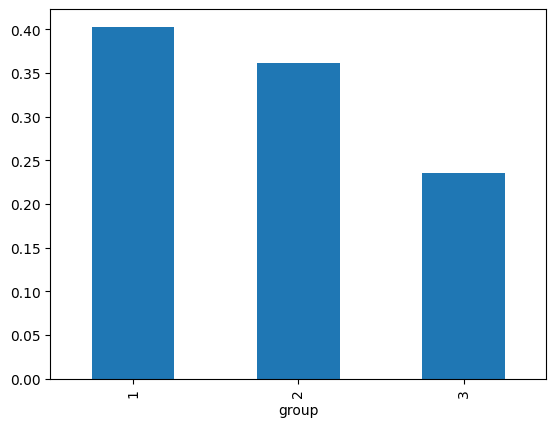

In [18]:
df.group.value_counts(normalize = True).plot.bar() #we use the normalize = true to have it as a percentage

Now, to further analyze mode, we need to understand a little more of our database and mainly the __group__ column. According to https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/anorexia.html, our database anorexia.csv weight change data for young female anorexia patients.

Being that the treatment (column: group) contains:
* Group 1: Individual cognitive behavioral therapy.
* Group 2: Control group
* Group 3: Family therapy.


The column Prewt

     Indicates the patient's weight before the study period, in pounds.

Postwt

     Indicates the patient's weight after the study period, in pounds.

To calculate the mode in numpy/pandas, we do it with .mode()

In [19]:
df.group.mode()

0    1
Name: group, dtype: int64

__DISCUSSION QUESTION 3__: What does the above result mean?

---

It ends up being easier to see this result if, instead of using the mode, we directly draw a table of occurrences of the groups and a histogram.

In [20]:
df[['group','ID']].groupby(['group']).count()

,ID
group,
1,29
2,26
3,17


array([[<Axes: title={'center': 'group'}>]], dtype=object)

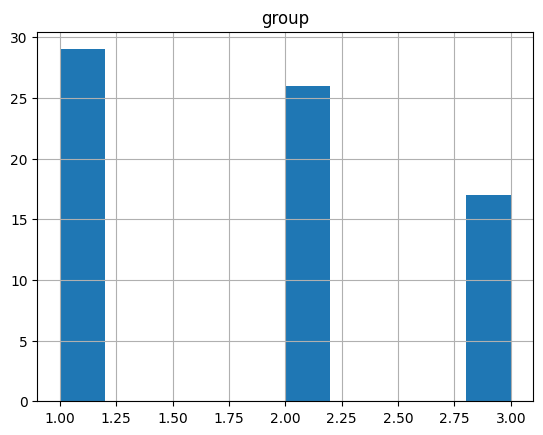

In [21]:
df.hist(column='group')

So it looks better that group 1 has more cases, followed by group 2 and then group 3, right?

---

__DISCUSSION QUESTION 4__: What information can we take from the mean, median and mode below?

In [22]:
df.mean()

ID        197.736111
group       1.833333
prewt      82.408333
postwt     85.172222
difwt       2.763889
dtype: float64

In [23]:
df.median()

ID        208.50
group       2.00
prewt      82.30
postwt     84.05
difwt       1.65
dtype: float64

In [24]:
df.group.mode()

0    1
Name: group, dtype: int64

---

In isolation these metrics say little about our data, but if we apply these metrics to groups 1, 2 and 3 our analysis starts to get interesting.

In [25]:
df.groupby(['group']).mean()

,ID,prewt,postwt,difwt
group,,,,
1,118.37931,82.689655,85.696552,3.006897
2,213.50000,81.557692,81.107692,-0.450000
3,309.00000,83.229412,90.494118,7.264706


__DISCUSSION QUESTION 5__: What information can we get from the mean and median by group (i.e. by treatment 1-Individual, 2-Control and 3-Family)? Which treatment seems to work best?

---

Well, to be sure about our analysis with the measures of central tendency. We need to know the dispersion measures of our population.

---

## PART 2 - Measure of Spread - Measures of Spread

### Min

The min represents the smallest value in a data set. Then we calculate the range as:

\Òbegin{equation}
Min = [Min Value].
\end{equation*}

Let's take again the example of the first 11 values of our variable weight __prewt__ which we know indicates the patient's weight before the study period, in pounds.

In [26]:
a = list(df.prewt.head(11));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]


In [27]:
min(a)

74.0

### Max

The max represents the largest value in a data set. Then we calculate the range as:

\begin{equation*}
Minimum = [Maximum value]
\end{equation*}

In [28]:
max(a)

91.8

### Range 

The rank is the difference between the largest value and the smallest value in a data set and is the simplest measure of spread. So we calculate the rank as:


\begin{equation*}
Range = [Maximum Value] - [Minimum Value].
\end{equation*}

So the range is:

In [29]:
max(a)-min(a)

17.799999999999997

Calculating the range in numpy/pandas for all variables.

In [30]:
df.groupby(['group']).max()

,ID,prewt,postwt,difwt
group,,,,
1,227,94.9,103.6,20.9
2,226,91.8,89.6,15.9
3,317,94.2,101.6,21.5


In [31]:
df.groupby(['group']).min()

,ID,prewt,postwt,difwt
group,,,,
1,101,70.0,71.3,-9.1
2,201,70.5,73.0,-12.2
3,301,73.4,75.2,-5.3


In [32]:
df.groupby(['group']).max() - df.groupby(['group']).min()

,ID,prewt,postwt,difwt
group,,,,
1,126,24.9,32.3,30.0
2,25,21.3,16.6,28.1
3,16,20.8,26.4,26.8


### Standard Deviation - Standard Deviation

Standard deviation measures the dispersion of data about the mean value. It is useful for comparing data sets that may have the same mean but a different range.



\begin{equation*}
Deviation.standard = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}
\end{equation*}


In [33]:
a = list(df.prewt.head(11));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]


In [34]:
x_bar = df.prewt.head(11).mean()
print("average=",x_bar)

average= 83.5


In [35]:
a_sum = 0.0
for x_i in a:
    a_sum = a_sum + (x_i - x_bar)**2
    print ("(x_i - x_bar)^2=(",x_i, "-",x_bar,")^2=", (x_i - x_bar)**2, "| SUMA = ", a_sum)

(x_i - x_bar)^2=( 80.5 - 83.5 )^2= 9.0 | SUMA =  9.0
(x_i - x_bar)^2=( 80.7 - 83.5 )^2= 7.839999999999984 | SUMA =  16.839999999999982
(x_i - x_bar)^2=( 83.8 - 83.5 )^2= 0.08999999999999829 | SUMA =  16.929999999999982
(x_i - x_bar)^2=( 84.9 - 83.5 )^2= 1.960000000000016 | SUMA =  18.889999999999997
(x_i - x_bar)^2=( 89.4 - 83.5 )^2= 34.810000000000066 | SUMA =  53.70000000000006
(x_i - x_bar)^2=( 83.3 - 83.5 )^2= 0.04000000000000114 | SUMA =  53.74000000000006
(x_i - x_bar)^2=( 81.5 - 83.5 )^2= 4.0 | SUMA =  57.74000000000006
(x_i - x_bar)^2=( 91.8 - 83.5 )^2= 68.88999999999996 | SUMA =  126.63000000000002
(x_i - x_bar)^2=( 86.0 - 83.5 )^2= 6.25 | SUMA =  132.88000000000002
(x_i - x_bar)^2=( 82.6 - 83.5 )^2= 0.8100000000000103 | SUMA =  133.69000000000003
(x_i - x_bar)^2=( 74.0 - 83.5 )^2= 90.25 | SUMA =  223.94000000000003


In [36]:
import math
print("Standard Deviation - Desviación estándar = ", math.sqrt(a_sum/(len(a)-1)))

Standard Deviation - Desviación estándar =  4.732229918336598


But in Python Pandas we can use __std__ ;-)

In [37]:
df.prewt.head(11).std()

4.732229918336598

### Quartiles and Interquartile Range - Quartiles and Interquartile Range.

Quartiles tell us about the spread of a data set by dividing the data set into 4 groups. Just as the median divides into N=2 groups by taking 1 central element or the average of the two central elements, the operation to find the quartiles (N=4) divides the data into 4 groups using 3 boundaries (N-1 boundaries generate N groups) and the boundaries are the 25% element, the 50% element (median) and the 75% element.


1st quartile - 25% percentile

In [38]:
df.prewt.quantile(0.25) # 25% percentil - Primero cuartil

79.6

Second quartile - Same as median - 50% percentile 

In [39]:
df.prewt.quantile(0.50)

82.3

In [40]:
df.prewt.median()

82.3

Third quartile - 75% percentile

In [41]:
df.prewt.quantile(0.75)

86.0

<Axes: >

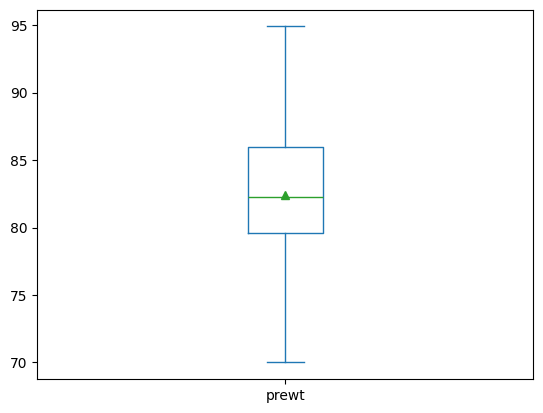

In [42]:
df.prewt.plot.box(showmeans=True)

---

### Describe

In pandas, the __describe__ function combines measures of central tendency and dispersion in a single operation.


In [43]:
df.prewt.describe()

count    72.000000
mean     82.408333
std       5.182466
min      70.000000
25%      79.600000
50%      82.300000
75%      86.000000
max      94.900000
Name: prewt, dtype: float64

The __loop__ below prints the __describe__ function by group for each of the continuous variables. 

In [44]:
for var in ['prewt', 'postwt', 'difwt']:
    print("VARIABLE = ", var)
    print(df[[var,'group']].groupby(['group']).describe())
    print("---")    

VARIABLE =  prewt
      prewt                                                        
      count       mean       std   min     25%    50%     75%   max
group                                                              
1      29.0  82.689655  4.845495  70.0  80.400  82.60  85.000  94.9
2      26.0  81.557692  5.707060  70.5  77.725  80.65  85.875  91.8
3      17.0  83.229412  5.016693  73.4  80.500  83.30  86.000  94.2
---
VARIABLE =  postwt
      postwt                                                        
       count       mean       std   min     25%   50%     75%    max
group                                                               
1       29.0  85.696552  8.351924  71.3  81.900  83.9  90.900  103.6
2       26.0  81.107692  4.744253  73.0  77.575  80.7  84.675   89.6
3       17.0  90.494118  8.475072  75.2  90.700  92.5  95.200  101.6
---
VARIABLE =  difwt
      difwt                                                 
      count      mean       std   min  25%   50%   75%

Perhaps the power of all this information for analysis is most evident in a BoxPlot graph:

Group 1: Individual Cognitive Behavior Therapy


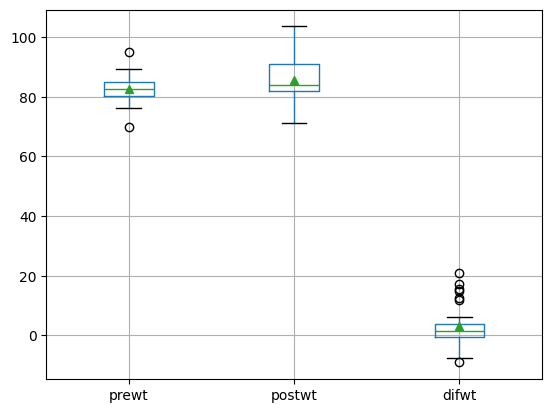

In [45]:
print("Group 1: Individual Cognitive Behavior Therapy")
boxplot = df[df.group == 1].boxplot(column=['prewt', 'postwt', 'difwt'],showmeans=True)


Group 2: Control group


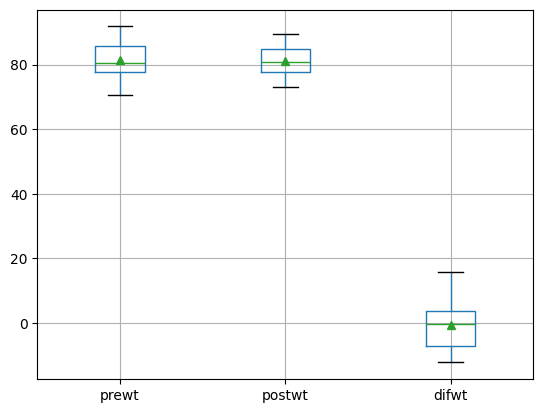

In [46]:
print("Group 2: Control group")
boxplot = df[df.group == 2].boxplot(column=['prewt', 'postwt', 'difwt'],showmeans=True)

Group 3: Family therapy


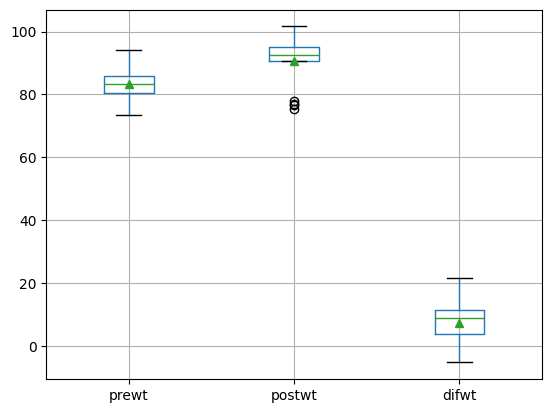

In [47]:
print("Group 3: Family therapy")
boxplot = df[df.group == 3].boxplot(column=['prewt', 'postwt', 'difwt'],showmeans=True)

__DISCUSSION QUESTION 6__: With all that information in hand, which treatment seems to work best?

---

#### Conclusions

How we choose to analyze data can lead to completely different results.
Often you can impact (intentionally or unintentionally) what people take for certain depending on how you communicate the results.

#### Tips
Be skeptical of your results and those provided by others.
Consider other ways of analyzing the data and whether you chose correctly.


---